In [126]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('ggplot')


Text(0, 0.5, 'label')

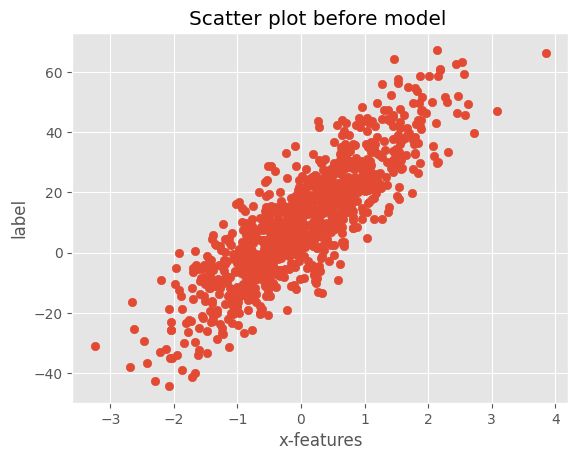

In [139]:
## making linear dataframe using np
x,y=make_regression(n_samples=1000, n_features=1, n_informative=10, n_targets=1, bias=10, noise=10, shuffle=True,  random_state=42)
# x=pd.DataFrame(x,columns=['feat'])
# y=pd.DataFrame(y,columns=['label'])
plt.scatter(x,y)
plt.title('Scatter plot before model ')
plt.xlabel('x-features')
plt.ylabel('label')
## line is kindof linear we can work on this dataset 

coeff [16.63354605] intercept 10.045262059058208
accuracy (r2) 0.7300121896115734


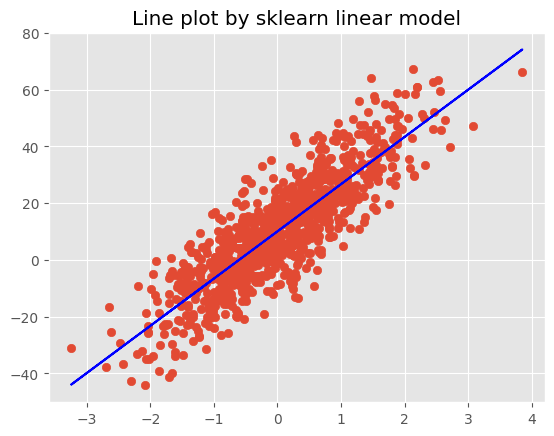

In [191]:
## Train data using sklearn linearRegression
lr=LinearRegression()
lr.fit(x,y)
c=lr.intercept_
m=lr.coef_
print('coeff {} intercept {}'.format(m,c))
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='blue')
plt.title('Line plot by sklearn linear model')
print('accuracy (r2)',r2_score(y,lr.predict(x)))
## Around 73 % accuracy by sklearn liner model 

### Linear Regression using own OLS METHOD FROM SCRATCH

<div>
<img src="ols_formula.jpeg" width="700"height='50'/>
</div>

In [231]:
# calculate m and b using above formula
class lrols:
    def __init__(self):
        self.m=None
        self.b=None
    def fit(self, x,y):
        num=0
        den=0
        x_shape=x.shape[0] 
        x_mean=x.mean()
        y_mean=y.mean()
        for i in range(x_shape):
            num=num+((y[i]-y_mean)/(x[i]-x_mean))
            den= den + (x[i]-x_mean)*(x[i]-x_mean)
        self.m =num/den
        self.b = y_mean - self.m *x_mean
        print("coeff {}  intercept {}".format(self.m, self.b))
    def predict(self, x):
        return ((self.m)*x)+self.b

In [232]:
mylr=lrols()

In [233]:
mylr.fit(x,y)

coeff [17.28720883]  intercept [10.03262541]


0.7288848158350898


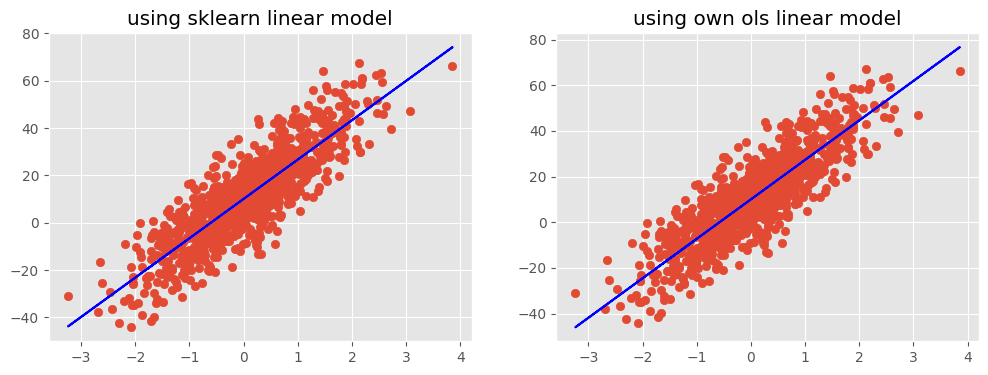

In [241]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(x,y)
plt.title('using sklearn linear model')
plt.plot(x,lr.predict(x),color='blue')

plt.subplot(122)
y_pred=mylr.predict(x)
plt.scatter(x,y)
plt.title('using own ols linear model')
plt.plot(x,y_pred,color='blue')
## internally scikit learn also uses ols method for linear regression
print(r2_score(y,y_pred))